In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
import kerastuner as kt

C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


C:\Users\ASUS\AppData\Local\Temp\ipykernel_16244\2730351359.py:10: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [2]:
df=pd.read_csv(r"C:\Users\ASUS\Downloads\train.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df['Cabin']=df['Cabin'].apply(lambda x: 0 if pd.isnull(x) else 1)

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


In [6]:
df=df.drop(columns=['Name','PassengerId'])

In [7]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,0,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,1,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,1,1,female,35.0,1,0,113803,53.1000,1,S
4,0,3,male,35.0,0,0,373450,8.0500,0,S


In [8]:
df['Family']=df['SibSp']+df['Parch']

In [9]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin         0
Embarked      2
Family        0
dtype: int64

In [10]:
from sklearn.impute import KNNImputer

In [11]:
k=KNNImputer(n_neighbors=5)

In [12]:
df['Age']=k.fit_transform(df[['Age']])

In [13]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,0,3,male,22.0,1,0,A/5 21171,7.2500,0,S,1
1,1,1,female,38.0,1,0,PC 17599,71.2833,1,C,1
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,0
3,1,1,female,35.0,1,0,113803,53.1000,1,S,1
4,0,3,male,35.0,0,0,373450,8.0500,0,S,0


In [14]:
df.dropna(inplace=True)

In [15]:
df.shape

(889, 11)

In [16]:
df.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Ticket      False
Fare        False
Cabin       False
Embarked    False
Family      False
dtype: bool

In [17]:
def tick(x):
    l=x.split(' ')
    return l[-1]

In [18]:
df['T_No']=df['Ticket'].apply(tick)

In [19]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,T_No
0,0,3,male,22.000000,1,0,A/5 21171,7.2500,0,S,1,21171
1,1,1,female,38.000000,1,0,PC 17599,71.2833,1,C,1,17599
2,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,0,S,0,3101282
3,1,1,female,35.000000,1,0,113803,53.1000,1,S,1,113803
4,0,3,male,35.000000,0,0,373450,8.0500,0,S,0,373450
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,211536,13.0000,0,S,0,211536
887,1,1,female,19.000000,0,0,112053,30.0000,1,S,0,112053
888,0,3,female,29.699118,1,2,W./C. 6607,23.4500,0,S,3,6607
889,1,1,male,26.000000,0,0,111369,30.0000,1,C,0,111369


In [20]:
def tick2(x):
    l=x.split(' ')
    if len(l)>1:
        return 1
    else:
        return 0

In [21]:
df['T']=df['Ticket'].apply(tick2)

In [22]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,T_No,T
0,0,3,male,22.0,1,0,A/5 21171,7.2500,0,S,1,21171,1
1,1,1,female,38.0,1,0,PC 17599,71.2833,1,C,1,17599,1
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,0,3101282,1
3,1,1,female,35.0,1,0,113803,53.1000,1,S,1,113803,0
4,0,3,male,35.0,0,0,373450,8.0500,0,S,0,373450,0


In [23]:
df=df.drop(columns=['Ticket','T_No'])

In [24]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family,T
0,0,3,male,22.0,1,0,7.2500,0,S,1,1
1,1,1,female,38.0,1,0,71.2833,1,C,1,1
2,1,3,female,26.0,0,0,7.9250,0,S,0,1
3,1,1,female,35.0,1,0,53.1000,1,S,1,0
4,0,3,male,35.0,0,0,8.0500,0,S,0,0


In [25]:
df=pd.get_dummies(df,drop_first=True)

In [26]:
y=df['Survived']
X=df.drop(columns='Survived')

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [30]:
s=StandardScaler()
X_train=s.fit_transform(X_train)
X_test=s.transform(X_test)

In [33]:
X_train.shape

(711, 11)

In [47]:
def build_model(hp):
    model=Sequential()
    c=0
    for i in range(hp.Int('Num_layers',min_value=1,max_value=25)):
        if c==0:
            model.add(Dense(hp.Int('Num_nodes'+str(i),min_value=8,max_value=512,step=8),activation=hp.Choice('Activation',['relu','tanh','sigmoid']),input_dim=11))
            model.add(Dropout(hp.Choice('Param'+str(i),[0.2,0.5,0.8,0.9])))
        else:
            model.add(Dense(hp.Int('Num_nodes'+str(i),min_value=1,max_value=512,step=8),activation=hp.Choice('Activation',['relu','tanh','sigmoid'])))
            model.add(Dropout(hp.Choice('Param'+str(i),[0.2,0.5,0.8,0.9])))
            model.add(BatchNormalization())
        c+=1
    
    model.compile(loss='binary_crossentropy',optimizer=hp.Choice('Optimizer',['adam','rmsprop','adadelta','sgd']),metrics=['accuracy'])
    return model

In [48]:
tuner=kt.RandomSearch(build_model,objective='val_accuracy',max_trials=10,directory='Titanic_HP',project_name='ANN')

In [49]:
tuner.search(X_train,y_train,validation_data=(X_test,y_test),epochs=10)

Trial 10 Complete [00h 00m 05s]
val_accuracy: 0.0

Best val_accuracy So Far: 0.5898876190185547
Total elapsed time: 00h 01m 20s


In [50]:
tuner.get_best_hyperparameters()[0].values

{'Num_layers': 21,
 'Num_nodes0': 464,
 'Activation': 'tanh',
 'Param0': 0.2,
 'Optimizer': 'rmsprop',
 'Num_nodes1': 1,
 'Param1': 0.2,
 'Num_nodes2': 1,
 'Param2': 0.2,
 'Num_nodes3': 1,
 'Param3': 0.2,
 'Num_nodes4': 1,
 'Param4': 0.2,
 'Num_nodes5': 1,
 'Param5': 0.2,
 'Num_nodes6': 1,
 'Param6': 0.2,
 'Num_nodes7': 1,
 'Param7': 0.2,
 'Num_nodes8': 1,
 'Param8': 0.2,
 'Num_nodes9': 1,
 'Param9': 0.2,
 'Num_nodes10': 1,
 'Param10': 0.2,
 'Num_nodes11': 1,
 'Param11': 0.2,
 'Num_nodes12': 1,
 'Param12': 0.2,
 'Num_nodes13': 1,
 'Param13': 0.2,
 'Num_nodes14': 1,
 'Param14': 0.2,
 'Num_nodes15': 1,
 'Param15': 0.2,
 'Num_nodes16': 1,
 'Param16': 0.2,
 'Num_nodes17': 1,
 'Param17': 0.2,
 'Num_nodes18': 1,
 'Param18': 0.2,
 'Num_nodes19': 1,
 'Param19': 0.2,
 'Num_nodes20': 1,
 'Param20': 0.2}

In [52]:
model=tuner.get_best_models(num_models=1)[0]

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 464)               5568      
                                                                 
 dropout (Dropout)           (None, 464)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 465       
                                                                 
 dropout_1 (Dropout)         (None, 1)                 0         
                                                                 
 batch_normalization (Batch  (None, 1)                 4         
 Normalization)                                                  
                                                                 
 dense_2 (Dense)             (None, 1)                 2         
                                                        

In [54]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,initial_epoch=11)

Epoch 12/100
23/23 [==============================] - 7s 32ms/step - loss: 4.4100 - accuracy: 0.5781 - val_loss: 6.3260 - val_accuracy: 0.5899
Epoch 13/100
23/23 [==============================] - 0s 8ms/step - loss: 4.7008 - accuracy: 0.5795 - val_loss: 6.3260 - val_accuracy: 0.5899
Epoch 14/100
23/23 [==============================] - 0s 8ms/step - loss: 4.5213 - accuracy: 0.5710 - val_loss: 6.3260 - val_accuracy: 0.5899
Epoch 15/100
23/23 [==============================] - 0s 8ms/step - loss: 4.5074 - accuracy: 0.5696 - val_loss: 6.3260 - val_accuracy: 0.5899
Epoch 16/100
23/23 [==============================] - 0s 8ms/step - loss: 4.7814 - accuracy: 0.5654 - val_loss: 6.3260 - val_accuracy: 0.5899
Epoch 17/100
23/23 [==============================] - 0s 8ms/step - loss: 3.9952 - accuracy: 0.5893 - val_loss: 6.3260 - val_accuracy: 0.5899
Epoch 18/100
23/23 [==============================] - 0s 8ms/step - loss: 4.0650 - accuracy: 0.5977 - val_loss: 6.3260 - val_accuracy: 0.5899
Epoch

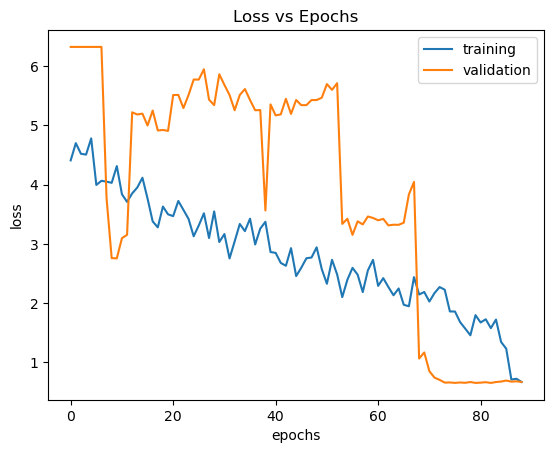

In [56]:
plt.plot(history.history['loss'],label='training')
plt.plot(history.history['val_loss'],label='validation')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss vs Epochs')
plt.legend(bbox_to_anchor=(1,1))

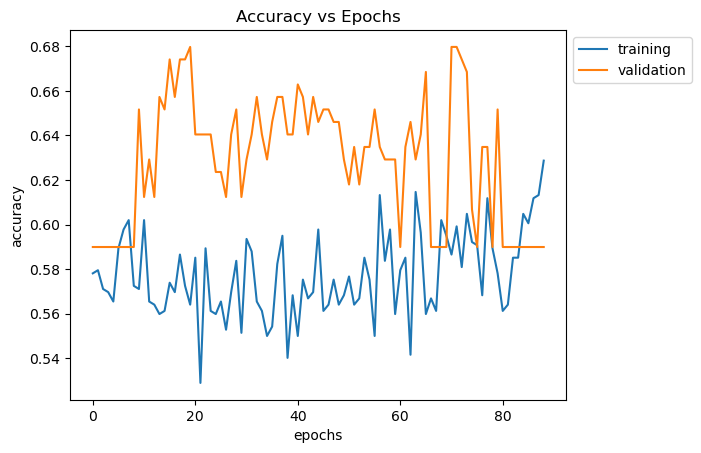

In [57]:
plt.plot(history.history['accuracy'],label='training')
plt.plot(history.history['val_accuracy'],label='validation')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Accuracy vs Epochs')
plt.legend(bbox_to_anchor=(1,1))